import sys
!{sys.executable} -m pip install beautifulsoup4

installing lxml library for parsing:

!{sys.executable} -m pip install lxml

In [25]:
# import Beautifulsoup library

from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime
import pandas as pd

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="de-de"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
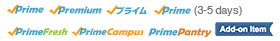

In [9]:
# connecting to the website

URL="https://www.amazon.de/Uniquebella-Mens-Thermal-Underwear-Set/dp/B07XXXGPS8/ref=sr_1_2_sspa?keywords=thermo+unterw%C3%A4sche+herren&qid=1670430675&sprefix=thermanl+%2Caps%2C116&sr=8-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1"

headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"}

# time to use the libraries we imported

page= requests.get(URL, headers=headers)

# Now, this is where we gonna start to bringing in the data

soup1=BeautifulSoup(page.content, "html.parser") # This brings every possible detail from the website

# Can we do a bit better? Lets do soup 2

soup2= BeautifulSoup(soup1.prettify(), "html.parser") # we can see that coz of prettify, the formatting has improved a bit


print(soup1)




In [10]:
# Lets specify what we exactly want out of soup2

title=soup2.find(id="productTitle").get_text()

print(title)


                   UNIQUEBELLA Thermounterwäsche Set, Funktionswäsche Herren Skiunterwäsche Winter Suit Ski Thermo-Unterwäsche Thermowäsche Unterhemd + Unterhose
                  


In [11]:
# We dont want just the title. we also want the price

price=soup2.find(id="corePriceDisplay_desktop_feature_div").get_text()

print(title)
print(price)

# we see there are lot of white spaces here in the results. We have to get rid of these later. 


                   UNIQUEBELLA Thermounterwäsche Set, Funktionswäsche Herren Skiunterwäsche Winter Suit Ski Thermo-Unterwäsche Thermowäsche Unterhemd + Unterhose
                  





                  27,99€
                 


                   27
                   
                    ,
                   


                   99
                  

                   €
                  














In [14]:
price.strip()

'27,99€\n                 \n\n\n                   27\n                   \n                    ,\n                   \n\n\n                   99\n                  \n\n                   €'

In [19]:
title=title.strip()

In [20]:
price=price.strip()[0:5]
title.strip()

print(price)
print(title)

27,99
UNIQUEBELLA Thermounterwäsche Set, Funktionswäsche Herren Skiunterwäsche Winter Suit Ski Thermo-Unterwäsche Thermowäsche Unterhemd + Unterhose


In [24]:
# bringing datetime now so that we can keep record of when the specific data was scrapped

today= datetime.date.today()

print(today)

2022-12-07


In [30]:
import csv

header= ["Title","Price", "Date"]
data= [title, price, today] # Since our data right now are of string type and this does not quite fit in the df, thatsy we are not 
                    # converting the string type to a list

with open("Web_Scrap101.csv","w", newline="", encoding="UTF8") as f: # here, creating the csv
    writer=csv.writer(f)
    writer.writerow(header) # inserting the header
    writer.writerow(data) # inserting the data
    
    

In [31]:
# calling the csv that is stored in our current directory

df=pd.read_csv(r"C:\Users\user\Documents\Untitled Folder\Web_Scrap101.csv")

In [32]:
print(df)

                                               Title  Price        Date
0  UNIQUEBELLA Thermounterwäsche Set, Funktionswä...  27,99  2022-12-07
